# 6 Applications to point clouds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pygsp import graphs, filters

## 6.1 Exercise: denoising

In [2]:
def plot_cloud(graph):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    graph.plot(ax=ax)
    ax.axis('off')

1) Take a clean point cloud. For example, `graphs.Bunny()`.

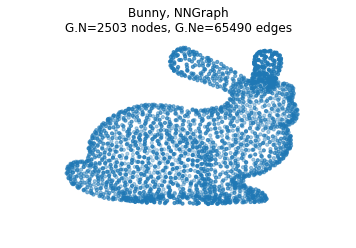

In [3]:
graph = graphs.Bunny()
plot_cloud(graph)

2) Add some noise, e.g. with `np.random.normal()`, to the 3D position of the vertices (stored in `graph.coords`).

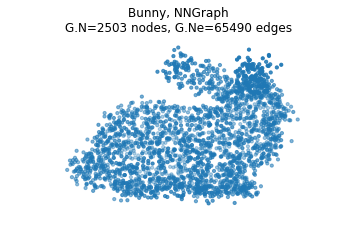

In [4]:
noise = np.random.normal(0, 0.05, size=(graph.N, 3))
coords_noisy = graph.coords + noise

graph.coords = coords_noisy

plot_cloud(graph)

3) Denoise the point cloud by low-pass filtering the noisy 3D position.

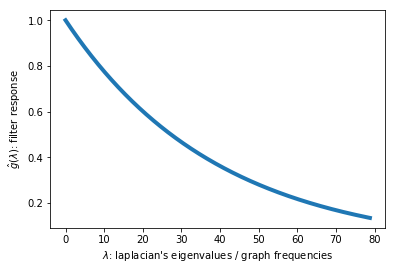

In [5]:
graph.estimate_lmax()
g = filters.Heat(graph, 2)
g.plot()

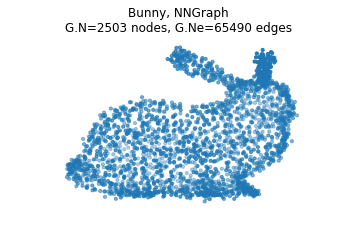

In [6]:
graph.coords = g.filter(coords_noisy)
plot_cloud(graph)

Why does it work so well? Find the trick, and use a more realistic approach.

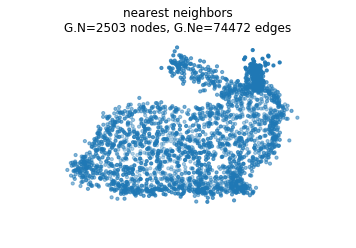

In [7]:
graph = graphs.NNGraph(coords_noisy, NNtype='radius', epsilon=0.2, plotting=graph.plotting)

graph.estimate_lmax()
g = filters.Heat(graph, 2)
graph.coords = g.filter(coords_noisy)

plot_cloud(graph)

## 6.2 Exercise: curvature estimation

In [8]:
graph = graphs.Bunny()
graph.estimate_lmax()

Create a filterbank of 6 mexican hat wavelets.
Visualize the filterbank in the spectral domain.

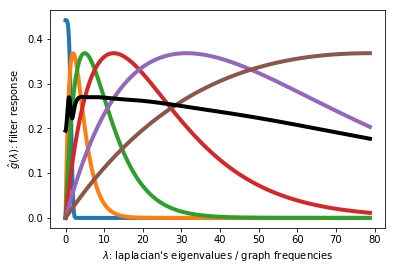

In [9]:
g = filters.MexicanHat(graph, Nf=6)
g.plot()

Visualize the filterbank in the vertex domain. Look at some of the localized wavelets.

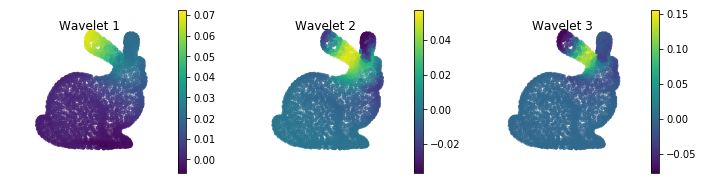

In [10]:
DELTA = 20

signal = g.localize(DELTA)

fig = plt.figure(figsize=(12, 3))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    graph.plot_signal(signal[:, i], ax=ax)
    _ = ax.set_title('Wavelet {}'.format(i+1))
    ax.set_axis_off()

Let's now try to estimate the curvature of the underlying 3D model by only using spectral filtering on the nearest-neighbor graph formed by its point cloud. A simple, but not theoretically grounded, way to accomplish that is to use the coordinates map $[x, y, z]$ and filter it using the above defined wavelets. Doing so gives us a
set of $N_f$ 3-dimensional signals $[g_i(L)x, g_i(L)y, g_i(L)z], \ i \in [0, \ldots, N_f]$ that describe variation along the 3 coordinates.

In [11]:
signal = graph.coords
signal = g.filter(signal)

The curvature is then estimated by taking the $\ell_1$ or $\ell_2$ norm across the 3D position.

In [12]:
signal = np.linalg.norm(signal, ord=2, axis=1)

Plot the result to observe that we indeed have a measure of the curvature at different scales.

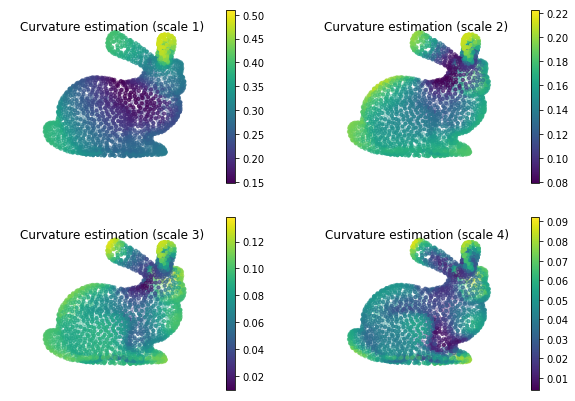

In [13]:
fig = plt.figure(figsize=(10, 7))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    graph.plot_signal(signal[:, i], ax=ax)
    title = 'Curvature estimation (scale {})'.format(i+1)
    _ = ax.set_title(title)
    ax.set_axis_off()